# Load and Structure Data

## Load the data

In [30]:
import pandas as pd
df = pd.read_csv('../data/raw/temp_anomalies.csv')
print(df.head())
print(df.info())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25 -0.09 -0.17 -0.10 -0.21 -0.18 -0.11 -0.15 -0.24 -0.22   
1  1881 -0.20 -0.15  0.03  0.05  0.05 -0.19  0.00 -0.04 -0.16 -0.22 -0.19   
2  1882  0.16  0.13  0.04 -0.16 -0.14 -0.22 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.14 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.40 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.18 -0.17   NaN   NaN -0.12 -0.17 -0.20  
1 -0.08 -0.09 -0.10 -0.18  0.04 -0.08 -0.19  
2 -0.36 -0.11 -0.09  0.07 -0.09 -0.16 -0.19  
3 -0.11 -0.18 -0.20 -0.34 -0.17 -0.10 -0.20  
4 -0.31 -0.29 -0.27 -0.11 -0.37 -0.32 -0.29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb

## Reshape data to Time Series

In [31]:
# Melt the monthly columns into a long format
monthly_df = df.melt(id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], var_name='Month', value_name='Temp_Anomaly')

# Create a Date column
month_map = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06','Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
monthly_df['Month'] = monthly_df['Month'].map(month_map)
monthly_df['Date'] = pd.to_datetime(monthly_df['Year'].astype(str) + '-' + monthly_df['Month'] + '-01')

# Sort by date and set as index
monthly_df = monthly_df[['Date', 'Temp_Anomaly']].sort_values('Date').set_index('Date')
print(monthly_df.head())

            Temp_Anomaly
Date                    
1880-01-01         -0.19
1880-02-01         -0.25
1880-03-01         -0.09
1880-04-01         -0.17
1880-05-01         -0.10


# Preprocess the Data

## Handle Missing Values

In [32]:
print(monthly_df.isna().sum())

Temp_Anomaly    7
dtype: int64


In [33]:
# interpolate missing data
monthly_df['Temp_Anomaly'] = monthly_df['Temp_Anomaly'].interpolate(method='linear')
print(monthly_df.isna().sum())

Temp_Anomaly    0
dtype: int64


## Validate Data

In [34]:
print(monthly_df.index.duplicated().sum())  # check for duplicate dates 
print(monthly_df.describe())  # Check min/max for outliers

0
       Temp_Anomaly
count   1728.000000
mean       0.066493
std        0.389778
min       -0.820000
25%       -0.220000
50%       -0.030000
75%        0.290000
max        1.370000


## Save Cleaned Data

In [35]:
monthly_df.to_csv('../data/processed/monthly_temp_anomalies.csv')

# Exploratory Data Analysis (EDA)

## Plot the Full Time Series

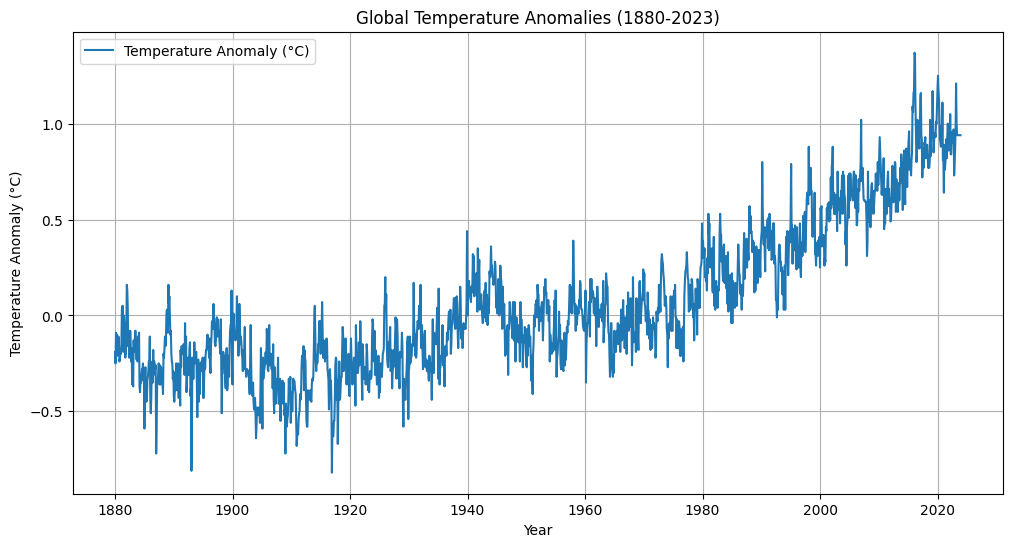

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_df['Temp_Anomaly'], label='Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies (1880-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Rolling Average

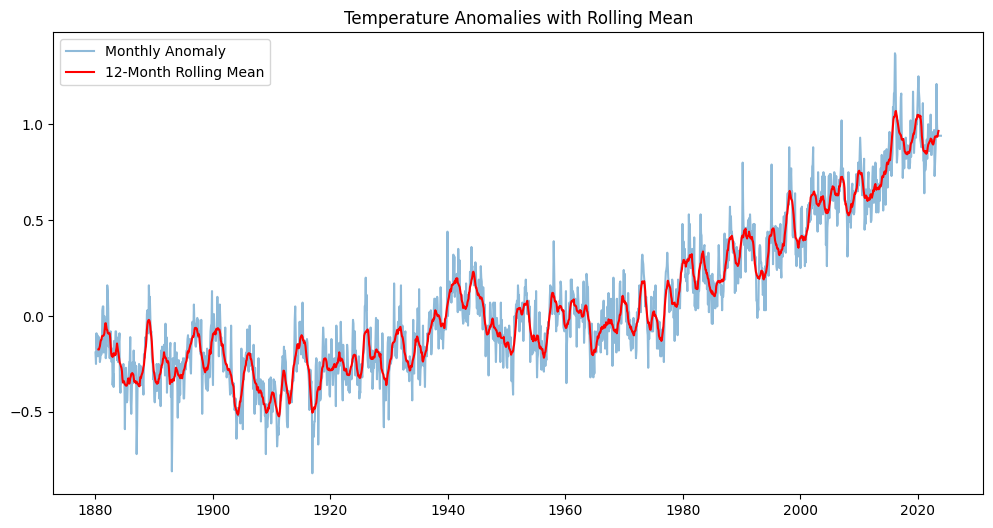

In [38]:
rolling_mean = monthly_df['Temp_Anomaly'].rolling(window=12, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['Temp_Anomaly'], label='Monthly Anomaly', alpha=0.5)
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')
plt.title('Temperature Anomalies with Rolling Mean')
plt.legend()
plt.show()

## Seasonal Decomposition

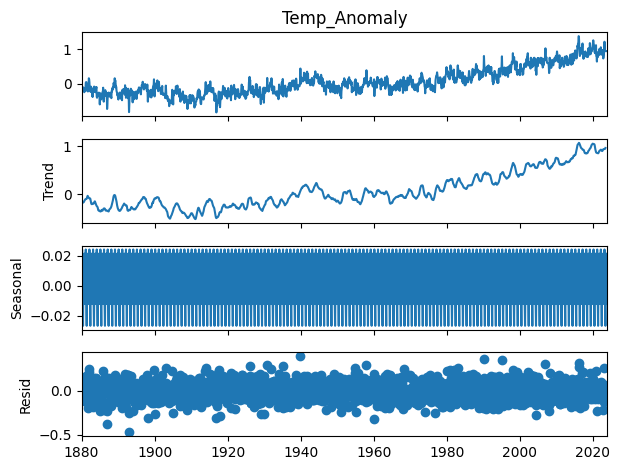

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly_df['Temp_Anomaly'], model='additive', period=12)
result.plot()
plt.show()

## Recent Trends

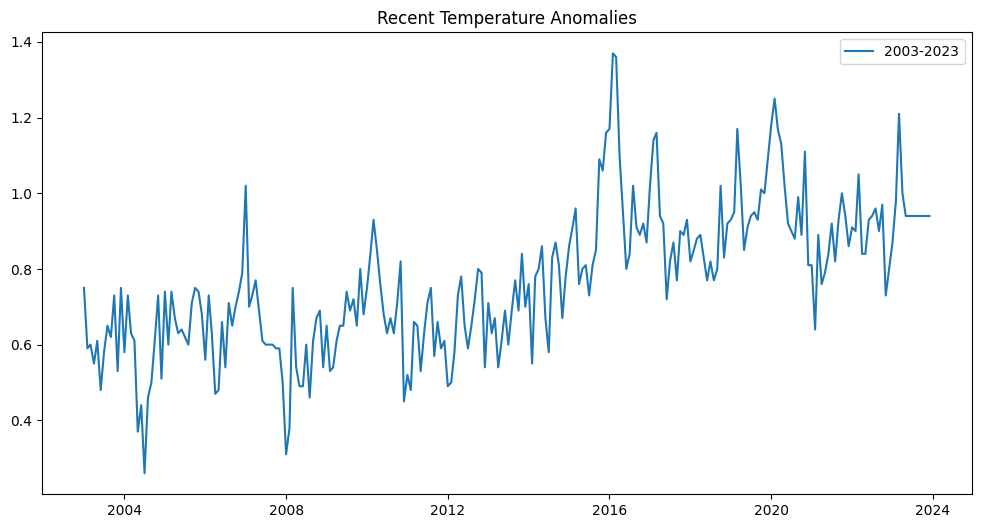

In [ ]:
recent = monthly_df['2003':]
plt.figure(figsize=(12, 6))
plt.plot(recent['Temp_Anomaly'], label='2003-2023')
plt.title('Recent Temperature Anomalies')
plt.legend()
plt.show()